# Assignment 2
### Gaby Lio, Shirley Zhu, Winnie Li, Jushira Thelakkat, Bhavana Vijay

In [2]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import nltk
import numpy as np

### Crawler

In [ ]:
data = {}
def get_data():
    for page in range(1,1000):
        h = BeautifulSoup(get('https://forums.edmunds.com/discussion/4011/general/x/chronic-car-buyers-anonymous/p{}'.format(page)).text,'lxml')
        for comment in h.findAll('li',{'class': 'Item ItemComment'}):
            data[comment.get('id')] = dict(
                user = comment.find('a',{'class':'Username'}).text,
                date = comment.find('time').get('datetime'),
                message = comment.find('div', {'class': 'Message'}).text,
            )
            if len(data) == 10000:
                return
    
get_data()
    
data = pd.DataFrame.from_dict(data, orient='index')
data.index = data.index.str.lstrip('Comment_')
data.message = data.message.str.replace(r"(\n?'?)",'')
data.date = pd.to_datetime(data.date)

In [ ]:
data.to_csv("comments.csv")

In [ ]:
data.head()

In [ ]:
len(data)

### Setup

In [3]:
comments = pd.read_csv('comments.csv', encoding = "ISO-8859-1")
comments['tokens'] = comments['message'].apply(str)
comments['tokens'] = comments['tokens'].map(nltk.word_tokenize)
comments.head()

,Unnamed: 0,user,date,message,tokens
0,2397707,akangl,2007-07-13 08:26:17,"Since Im in the Fatherland at the moment, I ca...","[Since, Im, in, the, Fatherland, at, the, mome..."
1,2397709,kyfdx,2007-07-13 13:59:53,but I bet you can make 2 years and 40k miles i...,"[but, I, bet, you, can, make, 2, years, and, 4..."
2,2397711,mark156,2007-07-13 14:52:36,"Akangl, I agree, I...","[Akangl, ,, I, agree, ,, I, think, Honda, coul..."
3,2397713,qbrozen,2007-07-13 16:06:37,i just read an MT ...,"[i, just, read, an, MT, article, this, morning..."
4,2397715,akangl,2007-07-13 16:21:07,Are funny. This i...,"[Are, funny, ., This, is, the, hardest, time, ..."


In [4]:
brands = pd.read_excel('ModelList.xlsx')
brands.head()

,Replace,Search
0,acura,integra
1,acura,Legend
2,acura,vigor
3,acura,rlx
4,acura,ILX


In [7]:
brandList = brands['Replace'].drop_duplicates().tolist()
def get_brands(tokens):
    result = []
    for t in tokens:
        t = t.lower()
        if t in brandList and not (t in result):
            result.append(t)
    return result
    
comments['brands'] = comments['tokens'].apply(get_brands)

### Brand frequency before replacement
- Discount 'car', 'problem', 'seat', and 'sedan'

In [8]:
flatBrands = [item for sublist in comments['brands'].tolist() for item in sublist]
pd.Series(flatBrands).value_counts()[0:14]

car        3573
bmw         595
honda       526
problem     397
seat        318
ford        309
toyota      285
volvo       271
mazda       247
sedan       229
dodge       212
nissan      200
saturn      191
subaru      152
dtype: int64

In [9]:
replace = brands['Replace'].tolist()
search = brands['Search'].tolist()
replaceDict = dict(zip(search, replace))

def replaceBrand(l):
    new_list = []
    for x in l:
        x = x.lower()
        if x not in list(replaceDict.keys()):
            x = x
        else:
            x = replaceDict[x]
        new_list.append(x)
    return new_list
    
comments['newTokens'] = comments['tokens'].apply(replaceBrand)
comments.head()

,Unnamed: 0,user,date,message,tokens,brands,newTokens
0,2397707,akangl,2007-07-13 08:26:17,"Since Im in the Fatherland at the moment, I ca...","[Since, Im, in, the, Fatherland, at, the, mome...",[],"[since, im, in, the, fatherland, at, the, mome..."
1,2397709,kyfdx,2007-07-13 13:59:53,but I bet you can make 2 years and 40k miles i...,"[but, I, bet, you, can, make, 2, years, and, 4...",[],"[but, i, bet, you, can, make, 2, years, and, 4..."
2,2397711,mark156,2007-07-13 14:52:36,"Akangl, I agree, I...","[Akangl, ,, I, agree, ,, I, think, Honda, coul...","[honda, acura]","[akangl, ,, i, agree, ,, i, think, honda, coul..."
3,2397713,qbrozen,2007-07-13 16:06:37,i just read an MT ...,"[i, just, read, an, MT, article, this, morning...","[car, bmw]","[i, just, read, an, mt, article, this, morning..."
4,2397715,akangl,2007-07-13 16:21:07,Are funny. This i...,"[Are, funny, ., This, is, the, hardest, time, ...",[car],"[are, funny, ., this, is, the, hardest, time, ..."


## TASK A: Plotting the MDS Map

Identify top 10 brands by frequency. From the posts, calculate lift ratios for associations between the brands. You will have to write a script to do this task). Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available on the Internet).

In [10]:
modelList = brands['Search'].drop_duplicates().tolist()
def get_models(tokens):
    result = []
    for t in tokens:
        if t in modelList and not (t in result):
            result.append(t)
    return result
    
comments['models'] = comments['tokens'].apply(get_models)
comments['newModels'] = comments['newTokens'].apply(get_models)

In [11]:
comments['newBrands'] = comments['newTokens'].apply(get_brands)
comments.head()

,Unnamed: 0,user,date,message,tokens,brands,newTokens,models,newModels,newBrands
0,2397707,akangl,2007-07-13 08:26:17,"Since Im in the Fatherland at the moment, I ca...","[Since, Im, in, the, Fatherland, at, the, mome...",[],"[since, im, in, the, fatherland, at, the, mome...",[],[],[volkswagen]
1,2397709,kyfdx,2007-07-13 13:59:53,but I bet you can make 2 years and 40k miles i...,"[but, I, bet, you, can, make, 2, years, and, 4...",[],"[but, i, bet, you, can, make, 2, years, and, 4...",[],[],[]
2,2397711,mark156,2007-07-13 14:52:36,"Akangl, I agree, I...","[Akangl, ,, I, agree, ,, I, think, Honda, coul...","[honda, acura]","[akangl, ,, i, agree, ,, i, think, honda, coul...",[MDX],[],"[honda, acura]"
3,2397713,qbrozen,2007-07-13 16:06:37,i just read an MT ...,"[i, just, read, an, MT, article, this, morning...","[car, bmw]","[i, just, read, an, mt, article, this, morning...",[],[],"[car, bmw]"
4,2397715,akangl,2007-07-13 16:21:07,Are funny. This i...,"[Are, funny, ., This, is, the, hardest, time, ...",[car],"[are, funny, ., this, is, the, hardest, time, ...",[],[],"[car, dodge, ford]"


### Brand frequency after model replacement
- Discount 'car', 'seat', 'problem'

In [14]:
flatBrands2 = [item for sublist in comments['newBrands'].tolist() for item in sublist]
pd.Series(flatBrands2).value_counts()[0:13]

car           4241
honda         1361
bmw            778
nissan         696
seat           663
problem        638
toyota         551
dodge          542
ford           524
chevrolet      457
volkswagen     448
volvo          330
chrysler       308
dtype: int64

In [15]:
# adding in fake data to make sure there are no zeros
listcomments= comments['newTokens'].tolist()

### Calculating Lift Ratios

In [16]:
top = ['honda', 'bmw', 'nissan', 'toyota', 'dodge', 'ford', 'chevrolet', 'volkswagen', 'volvo', 'chrysler']
dflift = pd.DataFrame(index = top, columns = top)

def twobrandcount(brand1, brand2, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand1) != 0 and eachcomment.count(brand2) != 0:
            count += 1
    return count

def singlebrandcount(brand, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand) != 0:
            count += 1
    return count

def liftratio(brand1, brand2, clist):
    numerator = twobrandcount(brand1, brand2, clist)*len(clist)
    denominator = singlebrandcount(brand1, clist)*singlebrandcount(brand2, clist)
    lift = float(numerator)/denominator
    return lift


for eachbrand in top:
    top = [brand for brand in top if brand != eachbrand]
    for j in range(len(top)):
        dflift[top[j]].loc[eachbrand] = liftratio(top[j], eachbrand, listcomments)
        dflift[eachbrand].loc[top[j]] = dflift[top[j]][eachbrand]
        
dflift

,honda,bmw,nissan,toyota,dodge,ford,chevrolet,volkswagen,volvo,chrysler
honda,NaN,1.05774,1.63631,2.76033,1.16585,1.38818,1.36661,1.65648,1.6031,2.19472
bmw,1.05774,NaN,0.812576,1.25969,0.355723,0.956651,0.73127,1.69276,2.06435,0.542517
nissan,1.63631,0.812576,NaN,2.32075,3.41965,2.3855,2.2322,1.73183,1.04493,1.9126
toyota,2.76033,1.25969,2.32075,NaN,1.105,2.11274,2.38278,2.18758,1.4849,1.88559
dodge,1.16585,0.355723,3.41965,1.105,NaN,2.81682,3.0683,0.782486,0.503187,4.01351
ford,1.38818,0.956651,2.3855,2.11274,2.81682,NaN,3.3825,2.3003,1.50359,3.53177
chevrolet,1.36661,0.73127,2.2322,2.38278,3.0683,3.3825,NaN,1.85605,1.12725,2.91284
volkswagen,1.65648,1.69276,1.73183,2.18758,0.782486,2.3003,1.85605,NaN,2.77327,1.52192
volvo,1.6031,2.06435,1.04493,1.4849,0.503187,1.50359,1.12725,2.77327,NaN,1.77096
chrysler,2.19472,0.542517,1.9126,1.88559,4.01351,3.53177,2.91284,1.52192,1.77096,NaN


In [17]:
mdsdf = 1/dflift
mdsdf = mdsdf.replace(np.nan, 0)
mdsmatrix = mdsdf.as_matrix()

In [18]:
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_classification
from sklearn import manifold

### Plotting MDS

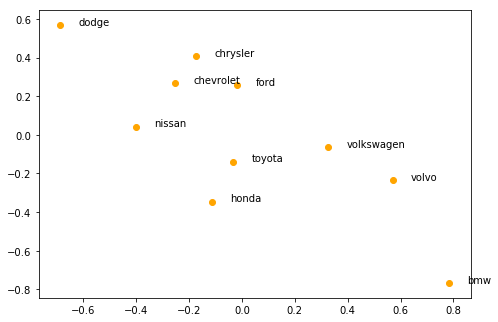

In [19]:
from matplotlib import pyplot as plt
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(mdsmatrix)
coords = results.embedding_
n =list(dflift.index)
x = coords[:, 0]
y = coords[:,1]
fig = plt.figure(1)
ax = plt.axes([0.,0.,1.,1.])
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o', color='orange')

for i, n in enumerate(n):
    ax.annotate(n,(x[i]+.07, y[i]))
plt.show()

## TASK B: Insights from A
What insights can you offer brand managers from your analysis in Task A (choose two brands that you can offer the most interesting/useful insights for)? 

## TASK C: Attributes
What are 5 most frequently mentioned attributes of cars in the discussions? Note that the same attribute may be described by different words – e.g., pick-up and acceleration may both refer to a more general attribute, “performance”. You have to make suitable replacements. Now pick the 5 most frequently mentioned brands. Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do a sentiment analysis for this assignment.

In [20]:
comments= comments.drop('Unnamed: 0',1)

In [21]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


In [22]:
stopset = set(stopwords.words('english'))
brandset = set(brandList)
punctset = set(string.punctuation)
def nonstop(l):
    tokens = [w.lower() for w in l if (not w.lower() in stopset and not w.lower() in brandset) and not w.lower() in punctset]
    return tokens

In [23]:
comments['nonstop']=comments['newTokens'].map(nonstop)

In [24]:
flatnonstop = [item for sublist in comments['nonstop'].tolist() for item in sublist]
pd.Series(flatnonstop).value_counts()[:5]

...      7474
like     3836
one      3697
get      3291
would    3266
dtype: int64

In [25]:
speechtypes = comments['nonstop'].map(nltk.pos_tag)
flat_speech = [item for sublist in speechtypes.tolist() for item in sublist]
df_pos = pd.DataFrame(flat_speech)
df_pos.rename(columns={0: 'token',1:'pos'}, inplace=True)

In [26]:
NN = df_pos[df_pos['pos']=='NN']
NN_count = pd.DataFrame(NN['token'].value_counts())
finaldf = NN_count[NN_count['token']>20]

In [94]:
csvattributes = pd.read_csv('finallist.csv')
attributes = csvattributes[['attribute', 'word']]
attributes.head()

,attribute,word
0,performance,speed
1,performance,time
2,reliability,years
3,reliability,year
4,reliability,new


In [114]:
replace = attributes['attribute'].tolist()
search = attributes['word'].tolist()
replaceDict = dict(zip(search, replace))

def replaceWord(l):
    new_list = []
    for x in l:
        x = x.lower()
        if x not in list(replaceDict.keys()):
            x = x
        else:
            x = replaceDict[x]
        new_list.append(x)
    return new_list
    
comments['nonstop'] = comments['nonstop'].apply(replaceWord)
comments.head()

,user,date,message,tokens,brands,newTokens,models,newModels,newBrands,nonstop,brandsattributes
0,akangl,2007-07-13 08:26:17,"Since Im in the Fatherland at the moment, I ca...","[Since, Im, in, the, Fatherland, at, the, mome...",[],"[since, im, in, the, fatherland, at, the, mome...",[],[],[volkswagen],"[since, im, fatherland, moment, use, early, mo...","[since, im, in, the, fatherland, at, the, mome..."
1,kyfdx,2007-07-13 13:59:53,but I bet you can make 2 years and 40k miles i...,"[but, I, bet, you, can, make, 2, years, and, 4...",[],"[but, i, bet, you, can, make, 2, years, and, 4...",[],[],[],"[bet, make, 2, reliability, 40k, fuel, ill, gi...","[but, i, bet, you, can, make, 2, reliability, ..."
2,mark156,2007-07-13 14:52:36,"Akangl, I agree, I...","[Akangl, ,, I, agree, ,, I, think, Honda, coul...","[honda, acura]","[akangl, ,, i, agree, ,, i, think, honda, coul...",[MDX],[],"[honda, acura]","[akangl, agree, think, could, make, look, attr...","[akangl, ,, i, agree, ,, i, think, honda, coul..."
3,qbrozen,2007-07-13 16:06:37,i just read an MT ...,"[i, just, read, an, MT, article, this, morning...","[car, bmw]","[i, just, read, an, mt, article, this, morning...",[],[],"[car, bmw]","[read, mt, article, morning, ranked, lr2, x3, ...","[i, just, read, an, mt, article, this, morning..."
4,akangl,2007-07-13 16:21:07,Are funny. This i...,"[Are, funny, ., This, is, the, hardest, time, ...",[car],"[are, funny, ., this, is, the, hardest, time, ...",[],[],"[car, dodge, ford]","[funny, hardest, performance, ive, finding, ma...","[are, funny, ., this, is, the, hardest, perfor..."


In [115]:
flatattributes = [item for sublist in comments['nonstop'].tolist() for item in sublist]
attributecount = pd.Series(flatattributes).value_counts()
attributecount.to_frame()[:18]

,0
reliability,9471
...,7474
performance,5735
make,4322
price,4149
like,3836
one,3697
fuel,3350
get,3291
would,3266


In [97]:
replace = attributes['attribute'].tolist()
search = attributes['word'].tolist()
replaceDict = dict(zip(search, replace))

def replaceAttribute(l):
    new_list = []
    for x in l:
        x = x.lower()
        if x not in list(replaceDict.keys()):
            x = x
        else:
            x = replaceDict[x]
        new_list.append(x)
    return new_list
    
comments['brandsattributes'] = comments['newTokens'].apply(replaceAttribute)

### Lift Ratios: Top Attributes

In [99]:
listcomments= comments['brandsattributes'].tolist()
top5cars = ['honda', 'bmw', 'nissan', 'toyota', 'dodge']
top5attributes = ['reliability', 'performance', 'price', 'fuel', 'familyfriendly']
dfattributelift = pd.DataFrame(index = top5attributes, columns = top5cars)

def twobrandcount(brand1, attribute, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand1) != 0 and eachcomment.count(attribute) != 0:
            count += 1
    return count

def singlebrandcount(brand, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand) != 0:
            count += 1
    return count

def liftratio(brand1, attribute, clist):
    numerator = twobrandcount(brand1, attribute, clist)*len(clist)
    denominator = singlebrandcount(brand1, clist)*singlebrandcount(attribute, clist)
    lift = float(numerator)/denominator
    return lift

for i in top5cars:
    for j in top5attributes:
        dfattributelift.set_value(i, j, liftratio(i,j, listcomments))

dfattributelift[['reliability', 'performance', 'price', 'fuel', 'familyfriendly']][5:]

,reliability,performance,price,fuel,familyfriendly
honda,1.288670,1.419847,1.386111,1.460611,1.373087
bmw,1.279647,1.196498,1.333139,1.212714,1.110267
nissan,1.385809,1.408090,1.124682,1.587564,1.336541
toyota,1.307842,1.377192,1.335412,1.465091,1.507377
dodge,1.452287,1.434070,1.234826,2.038643,1.409815


### Lift Ratios: Luxury Attributes

In [100]:
listcomments= comments['newTokens'].tolist()
top5cars = ['honda', 'bmw', 'nissan', 'toyota', 'dodge']
top5attributes = ['superior', 'luxury', 'driving', 'ultimate', 'best']
dfattributelift = pd.DataFrame(index = top5attributes, columns = top5cars)

def twobrandcount(brand1, attribute, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand1) != 0 and eachcomment.count(attribute) != 0:
            count += 1
    return count

def singlebrandcount(brand, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand) != 0:
            count += 1
    return count

def liftratio(brand1, attribute, clist):
    numerator = twobrandcount(brand1, attribute, clist)*len(clist)
    denominator = singlebrandcount(brand1, clist)*singlebrandcount(attribute, clist)
    lift = float(numerator)/denominator
    return lift

for i in top5cars:
    for j in top5attributes:
        dfattributelift.set_value(i, j, liftratio(i,j, listcomments))

dfattributelift[['superior', 'luxury', 'driving', 'ultimate', 'best']][5:] 

,superior,luxury,driving,ultimate,best
honda,2.449180,1.469508,1.753063,3.061474,1.771615
bmw,2.142245,1.885176,1.474714,3.213368,1.468036
nissan,1.197318,1.915709,1.723389,2.394636,1.239862
toyota,1.512402,1.693890,1.419725,3.024803,1.289764
dodge,0.000000,1.968020,2.068730,0.000000,1.030213


### Lift Ratios: Aspirational Attributes

In [113]:
listcomments= comments['newTokens'].tolist()
top5cars = ['honda', 'bmw', 'nissan', 'toyota', 'dodge']
top5attributes = ['want', 'buy', 'goals', 'own', 'dream']
dfattributelift = pd.DataFrame(index = top5attributes, columns = top5cars)

def twobrandcount(brand1, attribute, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand1) != 0 and eachcomment.count(attribute) != 0:
            count += 1
    return count

def singlebrandcount(brand, clist):
    count = 0
    for eachcomment in clist:
        if eachcomment.count(brand) != 0:
            count += 1
    return count
def liftratio(brand1, attribute, clist):
    numerator = twobrandcount(brand1, attribute, clist)*len(clist)
    denominator = singlebrandcount(brand1, clist)*singlebrandcount(attribute, clist)
    lift = float(numerator)/denominator
    return lift

for i in top5cars:
    for j in top5attributes:
        dfattributelift.set_value(i, j, liftratio(i,j, listcomments))

dfattributelift[['want', 'buy', 'goals', 'own', 'dream']][5:].to_csv('wow.csv') 